<a href="https://colab.research.google.com/github/Erick-Rodriguez01/IA/blob/main/TareaCoeficienteDeDeterminacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regresión Lineal
Ejemplo

In [13]:
## Librerias
import numpy as np
import itertools
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [2]:
## Datos
Carac = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6])
etiq = np.array([0.169610271922408, 0.283395812542308, 0.386358737510785, 0.470227872390909, 0.433281293764675, 0.600267648212653, 0.738338980436742, 0.790315020494445, 0.877464268422459, 0.84356446225183, 0.96443891694455])
if len(Carac) != len(etiq):
  print("Error!!!!")
print("%d datos cargados" %(len(Carac)))

11 datos cargados


In [3]:
"""
La presente función recibe dos arreglos tipo Numpy del mismo tamaño y
retorna la mitad del Error Cuadrático Medio de los dos array
"""
def funcCosto(arr_1, arr_2):
  J = np.power(arr_1-arr_2,2)
  return np.sum(J)/(2*len(J))

In [4]:
## Prueba de la función de costo
print(funcCosto(etiq,etiq))
print(funcCosto(np.array([0, 0, 0, 0, 0,1]),np.array([1, 0, 1, 1, 1,1])))

0.0
0.3333333333333333


In [5]:
## Pasos GridSearch
#  h(x) = T0 + T1*x

# 1. Valores a T0 a T1
dict_resultados = dict()
for T0 in np.arange(-3,3,1/100):
  for T1 in np.arange(-3,3,1/100):

#   2. Encuentras h(x)
    h_x = T0 + T1*Carac

#   3. Evalúar la función de costo
    dict_resultados[(T0,T1)]=funcCosto(h_x,etiq)
    
# 4. Encontrar el menor
parameters = list(dict_resultados.keys())
#print(parameters)
costValues = np.array(list(dict_resultados.values()))
#print(costValues)
indexMinCost = costValues.argmin()
print(indexMinCost)
bestParameters = parameters[indexMinCost]
print("Los mejores parámetros son:",bestParameters,"donde la función de costo retornó: ",costValues[indexMinCost])

182716
Los mejores parámetros son: (0.0399999999999352, 0.15999999999993264) donde la función de costo retornó:  0.0010407623021767825


El valor de R^2 calculado es igual a: 0.9672935681886871 En porcentaje equivalente a: 96.73%


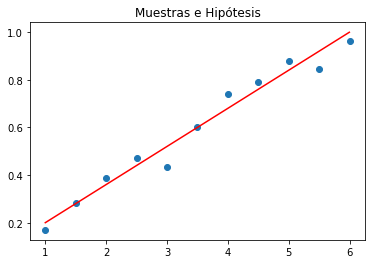

In [103]:
#5. Encontrar R^2
Y_1= bestParameters[0]+bestParameters[1]*Carac ##Y calculada
error=(etiq-Y_1)           ##Error (Y real - Y calculada)
errorT=np.sum(error*error) ##Sumatoria Error cuadrado Total
promedioY=np.mean(etiq)    ##promedio de la Y real
Denom=(etiq-promedioY)*(etiq-promedioY) #Varianza Denominador
DenomSum= np.sum(Denom)    ##Sumatoria
Rcuadrado= (1-(errorT/DenomSum)) #Calculo de R^2
P_Rcuadrado= '{:.2%}'.format(Rcuadrado) #R^2 en porcentaje 
print("El valor de R^2 calculado es igual a:",Rcuadrado, "En porcentaje equivalente a:",P_Rcuadrado)

##Imp grafico##
plt.scatter(Carac,etiq)
x = np.arange(Carac.min(),Carac.max(),(Carac.max()-Carac.min())/1000)
plt.plot(x,bestParameters[0]+bestParameters[1]*x,'r-')
plt.title("Muestras e Hipótesis")
plt.show()
